In [71]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import calendar
import seaborn as sns

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [72]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [73]:
df_DA_US_explode = df_DA_US.explode("job_skills")

In [74]:
df_DA_US_explode["month_no"] = df_DA_US_explode["job_posted_date"].dt.month

In [75]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index="month_no", columns="job_skills", aggfunc="size", fill_value=0)

In [76]:
df_DA_US_pivot.loc["total"] = df_DA_US_pivot.sum()

In [77]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc["total"].sort_values(ascending=False).index]

df_DA_US_pivot =df_DA_US_pivot.drop("total")


In [78]:
df_DA_US["month_no"] = df_DA_US["job_posted_date"].dt.month

In [79]:
df_DA_totals = df_DA_US.groupby("month_no").size()

In [80]:
df_DA_US_percent = df_DA_US_pivot.div(df_DA_totals/100, axis=0)

In [81]:
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent["month"] = df_DA_US_percent["month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))


In [82]:
df_DA_US_percent = df_DA_US_percent.set_index("month")

In [83]:
df_DA_US_percent = df_DA_US_percent.drop(columns="month_no")

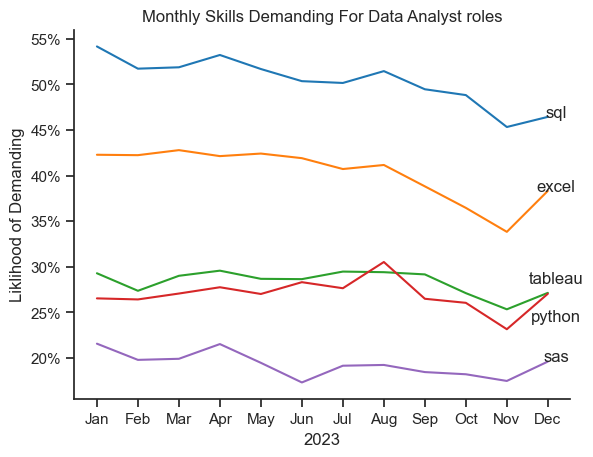

In [108]:

df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data= df_plot, dashes=False, palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Monthly Skills Demanding For Data Analyst roles")
plt.ylabel("Liklihood of Demanding")
plt.xlabel("2023")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    y_offset = 0
    if df_plot.columns[i] == "python":
        y_offset = -3  
    elif df_plot.columns[i] == "tableau":
        y_offset = 1  

    plt.text(11.2, df_plot.iloc[-1, i] + y_offset, df_plot.columns[i], ha="center")